# ANÁLISIS DEL LOS DATASETS DE SIGNOS VITALES WEARABLE TRANSFORMADOS DE SYNTHEA

El dataset <code>UnknownAgeMaternalRisk</code> viene del dataset creado a partir del software opensource de synthea para crear pacientes sintéticos, y que a partir de la plataforma <a href="https://docs.gretel.ai/gretel-basics/getting-started/quickstart">gretel.ai</a> hemos extendido para tener medidas todos los días durante 9 meses para todos los mismos usuarios, desde la primera fecha de su primera medida hasta el momento del parto (semana 42)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import plotly.express as px

from datetime import date
from datetime import datetime


In [2]:
UnknownAgeMaternalRisk= pd.read_csv('MaternalRiskDatasetUnknownAge.csv')

In [5]:
UnknownAgeMaternalRisk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285472 entries, 0 to 285471
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PATIENT          285472 non-null  object 
 1   DATE             285472 non-null  object 
 2   BMI              285472 non-null  float64
 3   DBP              285472 non-null  float64
 4   Glucose          285472 non-null  float64
 5   HeartRate        285472 non-null  float64
 6   SBP              285472 non-null  float64
 7   TRIMESTER        285472 non-null  int64  
 8   BodyTemperature  285472 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 19.6+ MB


In [7]:
UnknownAgeMaternalRisk['DATE'] = pd.to_datetime(UnknownAgeMaternalRisk['DATE'])

Vamos a cmabiar la fecha porque queremos que sólo comprenda el año 2024. 

In [10]:
UnknownAgeMaternalRisk['DATE'].apply(lambda x: x.replace(year=2024))

0        2024-12-10 10:34:58+00:00
1        2024-12-10 18:34:58+00:00
2        2024-12-11 02:34:58+00:00
3        2024-12-11 10:34:58+00:00
4        2024-12-11 18:34:58+00:00
                    ...           
285467   2024-01-15 21:49:39+00:00
285468   2024-01-16 05:49:39+00:00
285469   2024-01-16 13:49:39+00:00
285470   2024-01-16 21:49:39+00:00
285471   2024-01-17 05:49:39+00:00
Name: DATE, Length: 285472, dtype: datetime64[ns, UTC]

# ÁNALISIS 

## Verificación del número de medidas al día

In [13]:
def verifica_medidas_porDia(df, user_col, timestamp_col):
    """
    Verifica si todos los usuarios tienen el mismo número de medidas al día. 
    Args:
        - df: dataframe 
        - user_col: columna con ids usuarios. 
        - timestamp_col : columna con timestamps. 
    Returns: 
        None: imprime resultados. 
    """
     #creamos fecha columna sin las horas
    df[timestamp_col] = pd.to_datetime(df[timestamp_col], errors='coerce', dayfirst=True)

    df['date'] = df[timestamp_col].dt.date
    medidas_porDia = df.groupby([user_col, 'date']).size().reset_index(name='num_medidas')

    #verificar si todos los usuarios tienen mismo num de medidas al día
    medidas_unicas = medidas_porDia['num_medidas'].unique()
    
    if len(medidas_unicas)==1:
        print(f"Todos los usuarios tienen el mismo numero de medidas al día: {medidas_unicas[0]}")
    else:
            print(f"Los usuarios tienen diferentes números de medidas al día:{ medidas_porDia.groupby('num_medidas').size()}")
            plt.hist(medidas_porDia['num_medidas'], bins=range(1, medidas_porDia['num_medidas'].max() + 2), edgecolor='black')
            plt.title("Distribución del número de medidas al día")
            plt.xlabel("Número de medidas al día")
            plt.ylabel("Frecuencia")
            plt.xticks(range(1, medidas_porDia['num_medidas'].max() + 1))
            plt.show()

Los usuarios tienen diferentes números de medidas al día:num_medidas
1      238
2      228
3    94926
dtype: int64


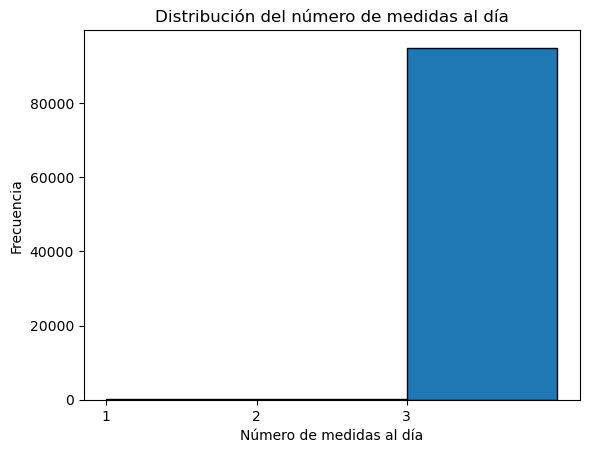

In [14]:
verifica_medidas_porDia(UnknownAgeMaternalRisk,'PATIENT' , 'DATE')

## ESTADÍSTICAS DE LA MUESTRA

In [27]:
UnknownAgeMaternalRisk.describe()

,BMI,DBP,Glucose,HeartRate,SBP,TRIMESTER,BodyTemperature,Day,Month,Trimester
count,285472.000000,285472.000000,285472.000000,285472.000000,285472.000000,285472.000000,285472.000000,285472.000000,285472.000000,285472.000000
mean,26.776364,78.489043,95.091014,99.487205,117.967784,1.956843,37.128013,15.740581,6.505913,2.502978
std,3.415162,15.622230,17.413522,16.273299,19.287067,0.829103,0.184670,8.805596,3.397250,1.102420
min,18.500000,24.531157,57.122836,65.490179,50.686681,1.000000,36.800006,1.000000,1.000000,1.000000
25%,24.860000,67.326985,82.711324,88.732011,104.759514,1.000000,36.971325,8.000000,4.000000,2.000000
50%,28.000000,77.111475,95.595262,98.733422,117.792767,2.000000,37.077293,16.000000,7.000000,3.000000
75%,29.500000,89.454818,104.714208,108.282946,130.858956,3.000000,37.331625,23.000000,9.000000,3.000000
max,30.000000,136.945711,212.346645,214.465072,189.951467,3.000000,37.399999,31.000000,12.000000,4.000000


## DISTRIBUCIÓN MENSUAL VARIABLES

Vamos a comporbar si el dataset creado capta las variaciones diarias y entre trimestres de los signos vitales durante el embarazo

In [19]:
UnknownAgeMaternalRisk['Day'] = UnknownAgeMaternalRisk['DATE'].dt.day
UnknownAgeMaternalRisk['Month'] = UnknownAgeMaternalRisk['DATE'].dt.month
UnknownAgeMaternalRisk['Trimester'] = ((UnknownAgeMaternalRisk['Month'] - 1) //3) + 1

#calculamos la media para los distintos grupos formados
daily_distribution = UnknownAgeMaternalRisk.groupby(['Day'])[[ 'DBP', 'Glucose', 'HeartRate', 'SBP']].mean()
monthly_distribution = UnknownAgeMaternalRisk.groupby(['Month'])[['DBP', 'Glucose', 'HeartRate', 'SBP']].mean()
trimester_distribution = UnknownAgeMaternalRisk.groupby(['Trimester'])[['DBP', 'Glucose', 'HeartRate', 'SBP']].mean()

In [22]:
def plot_distributions(distribution, title, xlabel):
    distribution.plot(figsize=(10,6))
    plt.title('Distribución diaria, mensual y trimestral de las variables', fontsize = 14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Average Values', fontsize = 12)
    plt.legend(title='Vital Signs', loc = 'upper left')
    plt.grid()
    plt.show()

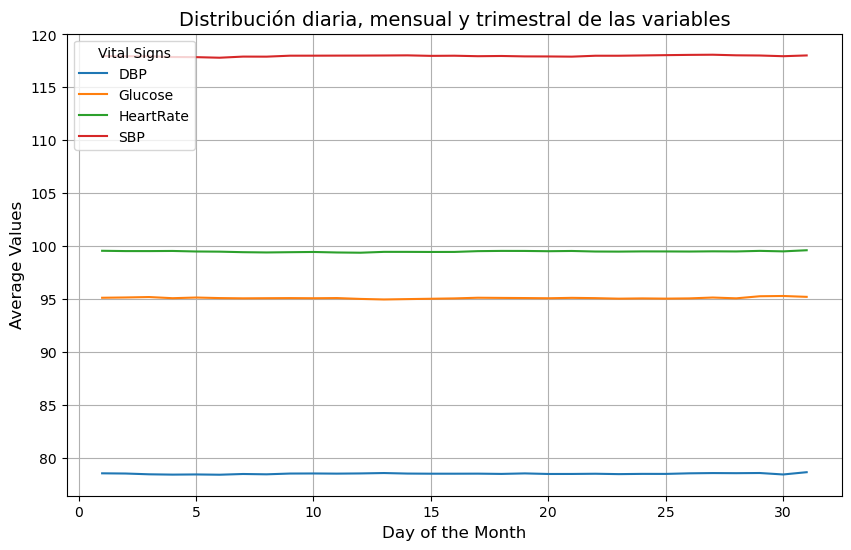

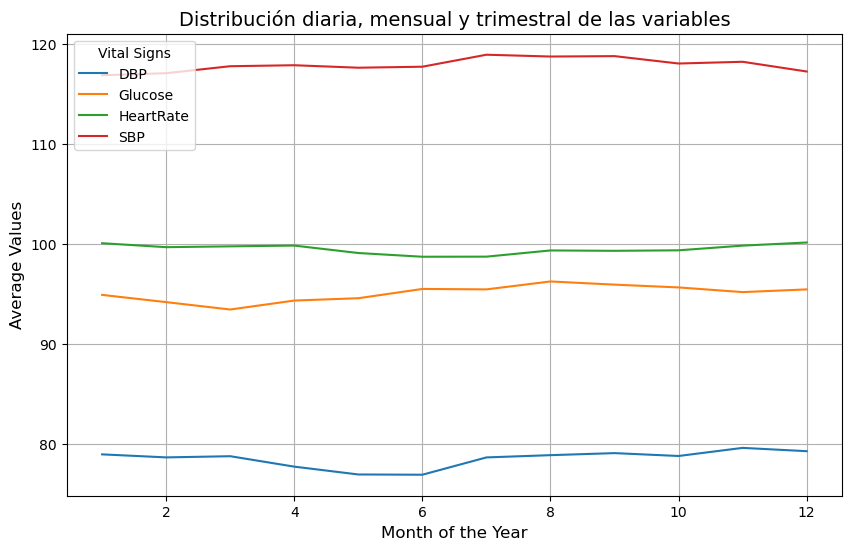

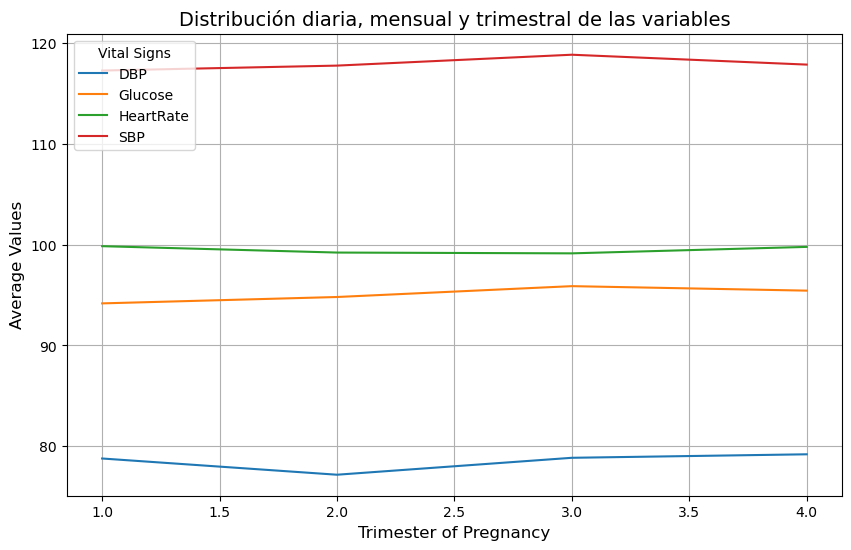

In [24]:
plot_distributions(daily_distribution, "Daily Variation of Vital Signs", "Day of the Month")
plot_distributions(monthly_distribution, "Monthly Variation of Vital Signs", "Month of the Year")
plot_distributions(trimester_distribution, "Trimester Variation of Vital Signs", "Trimester of Pregnancy")